## Loading a dataset into Scivision

Example of loading the BeeImage dataset.

In [1]:
from scivision import default_catalog

In [2]:
compatible_datasources = default_catalog.compatible_datasources("image-classifiers").to_dataframe()
compatible_datasources

,name,description,tasks,domains,url,format,labels_provided,institution,tags
2,data-002,None,"(TaskEnum.classificiation,)","(oceanography,)",https://github.com/scotthosking/intake-plankto...,image,True,"(CEFAS,)","(help-needed, 2D)"
3,data-003,Koala,"(TaskEnum.object_detection, TaskEnum.classific...","(computer-vision,)",https://github.com/alan-turing-institute/scivi...,image,True,"(Wikipedia by Erik Veland,)","(demo,)"
4,data-004,Sample dataset of Plankton required to demonst...,"(TaskEnum.classificiation,)","(computer-vision,)",https://raw.githubusercontent.com/alan-turing-...,image,True,"(Centre for Environment, Fisheries and Aquacul...","(2D, plankton, ecology, environmental-science)"
5,data-005,Sample dataset of satellite imagery required t...,"(TaskEnum.classificiation, TaskEnum.segmentation)","(computer-vision, earth-observation, ecology)",https://github.com/MartinSJRogers/VEdge_Detect...,image,False,"(Cambridge University,)","(2D, satellite, remote-sensing, ecology, envir..."
7,data-007,"A labelled dataset of honeybee images, from Ka...","(TaskEnum.classificiation,)","(nature, insects, bee-keeping)",https://github.com/nbarlowATI/honeybee_data_repo,image,True,"(alan-turing-institute,)","(bees, biology, classification)"


In [3]:
target_datasource = compatible_datasources.loc[compatible_datasources['name'] == 'data-007']
target_datasource

,name,description,tasks,domains,url,format,labels_provided,institution,tags
7,data-007,"A labelled dataset of honeybee images, from Ka...","(TaskEnum.classificiation,)","(nature, insects, bee-keeping)",https://github.com/nbarlowATI/honeybee_data_repo,image,True,"(alan-turing-institute,)","(bees, biology, classification)"


In [4]:
from scivision import load_dataset

In [5]:
data_url = target_datasource['url'].item()
data_url

AnyUrl('https://github.com/nbarlowATI/honeybee_data_repo', scheme='https', host='github.com', tld='com', host_type='domain', path='/nbarlowATI/honeybee_data_repo')

In [6]:
data_config = load_dataset(data_url)
data_config

data:
  args:
    path: https://raw.githubusercontent.com/nbarlowATI/honeybee_data_repo/main/.scivision/data.yml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


In [7]:
images = data_config.honeybee().to_dask()

/Users/nbarlow/miniforge3/envs/kaggle-bee-env/lib/python3.8/site-packages/xarray/core/dataarray.py:1195: FutureWarning: None value for 'chunks' is deprecated. It will raise an error in the future. Use instead '{}'
  warnings.warn(


In [8]:
test_image = images[1]

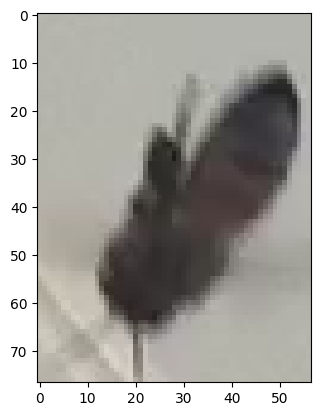

In [9]:
import matplotlib.pyplot as plt
plt.imshow(test_image)